In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel('data.xlsx')
data.head()

,Nombre y apellidos,Edad,Sexo,App HTA,App DM,App AB,App Cardiopatía Isquémica,App Vasculitis,App Colagenopatías,Etiología del empaquetamiento,...,Presencia de hipotensión arterial o shock,Tiempo quirúrgico,# de hemoderivados usados,componentes triada letal,traumas asociado,VAM,Reempaquetamiento,Apache II,Sofa,Estado al egreso
0,Maikel Junior Alfaro Lopez,16,1,1,1,1,1,1,1,2,...,0,2,4,2,4,1,1,7,3,1
1,Ismany Pedraza Herrera,52,1,0,1,1,1,1,1,5,...,0,3,9,3,4,0,1,17,13,2
2,Yuniel Alvarez Medina,32,1,1,1,0,1,1,1,3,...,0,2,4,1,0,1,1,23,9,1
3,Ciro Cardenas Bermudez,70,1,0,0,1,0,1,1,1,...,1,2,2,1,0,0,1,4,7,1
4,Owen Antonio Garcia alvarez,46,1,1,0,0,1,1,1,2,...,0,3,6,3,4,0,1,8,15,2


In [48]:
data.columns

Index(['Nombre y apellidos', 'Edad', 'Sexo', 'App HTA', 'App DM', 'App AB',
       'App Cardiopatía Isquémica', 'App Vasculitis', 'App Colagenopatías',
       'Etiología del empaquetamiento', 'Número de compresas utilizadas',
       'Horas transcurridas al desempaquetamiento',
       'Daño orgánico tubular asociado', 'Peritonitis asociada',
       'Lesión de vía biliar asociada',
       'Presencia de hipotensión arterial o shock  ', 'Tiempo quirúrgico',
       '# de hemoderivados  usados', 'componentes triada letal',
       'traumas asociado', 'VAM', 'Reempaquetamiento', 'Apache II', 'Sofa',
       'Estado al egreso'],
      dtype='object')

In [49]:
data.drop('Nombre y apellidos', axis=1, inplace = True)

Text(0, 0.5, 'Número de casos')

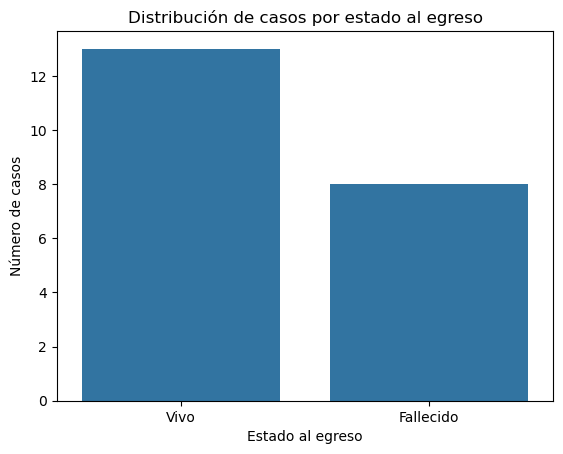

In [50]:
sns.countplot(x='Estado al egreso', data=data)
plt.title('Distribución de casos por estado al egreso')
plt.xticks(ticks=[0, 1], labels=['Vivo', 'Fallecido'])
plt.xlabel('Estado al egreso')
plt.ylabel('Número de casos')

In [51]:
data['Estado al egreso'].value_counts()

Estado al egreso
1    13
2     8
Name: count, dtype: int64

In [52]:
y = data['Estado al egreso']
X = data.drop('Estado al egreso', axis=1)
X.var(axis=0)

Edad                                           282.247619
Sexo                                             0.190476
App HTA                                          0.247619
App DM                                           0.128571
App AB                                           0.161905
App Cardiopatía Isquémica                        0.161905
App Vasculitis                                   0.000000
App Colagenopatías                               0.000000
Etiología del empaquetamiento                    1.347619
Número de compresas utilizadas                   0.447619
Horas transcurridas al desempaquetamiento        0.533333
Daño orgánico tubular asociado                   0.190476
Peritonitis asociada                             0.090476
Lesión de vía biliar asociada                    0.047619
Presencia de hipotensión arterial o shock        0.161905
Tiempo quirúrgico                                0.561905
# de hemoderivados  usados                       6.461905
componentes tr

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

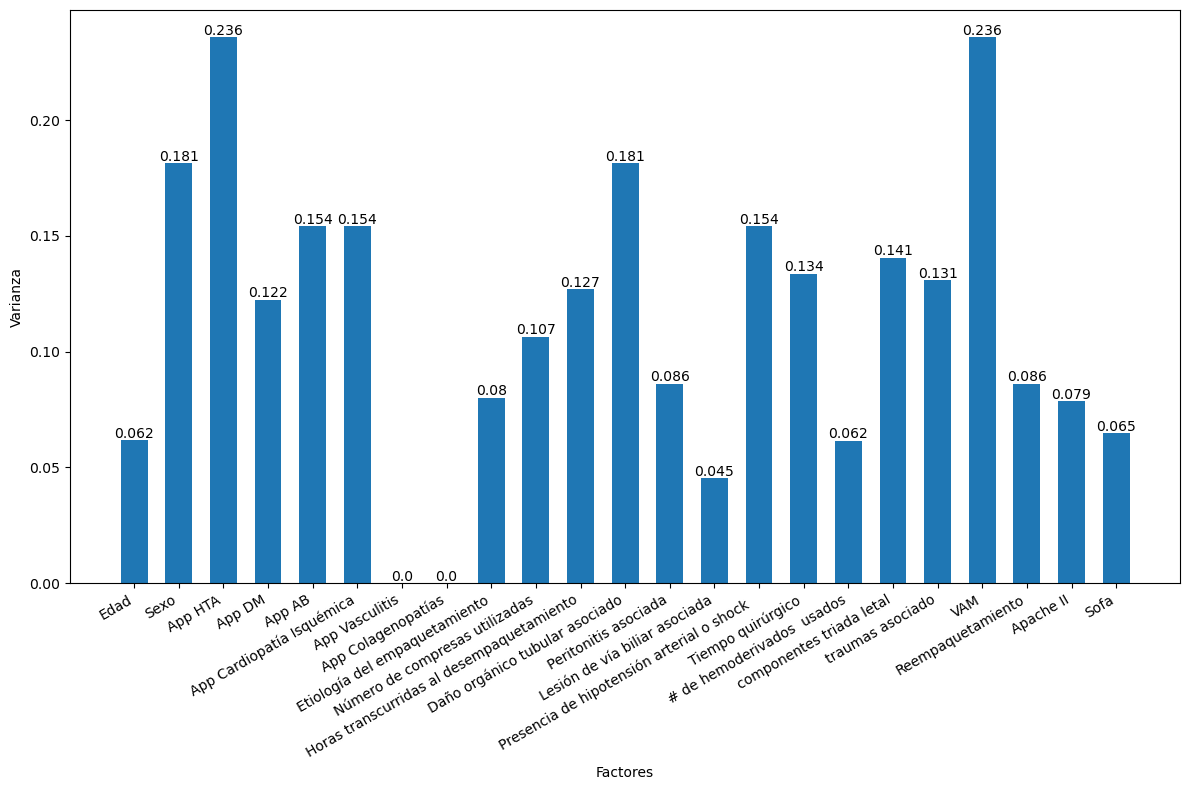

In [54]:
fig , ax = plt.subplots()

fig.set_size_inches(12,8)

x = X.columns
y_ = scaled_X.var(axis=0)

ax.bar(x, y_, width=0.6)
ax.set_xlabel('Factores')
ax.set_ylabel('Varianza')

for index, value in enumerate(y_):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()    

In [55]:
X.drop(['App Vasculitis', 'App Colagenopatías'], axis=1, inplace=True)

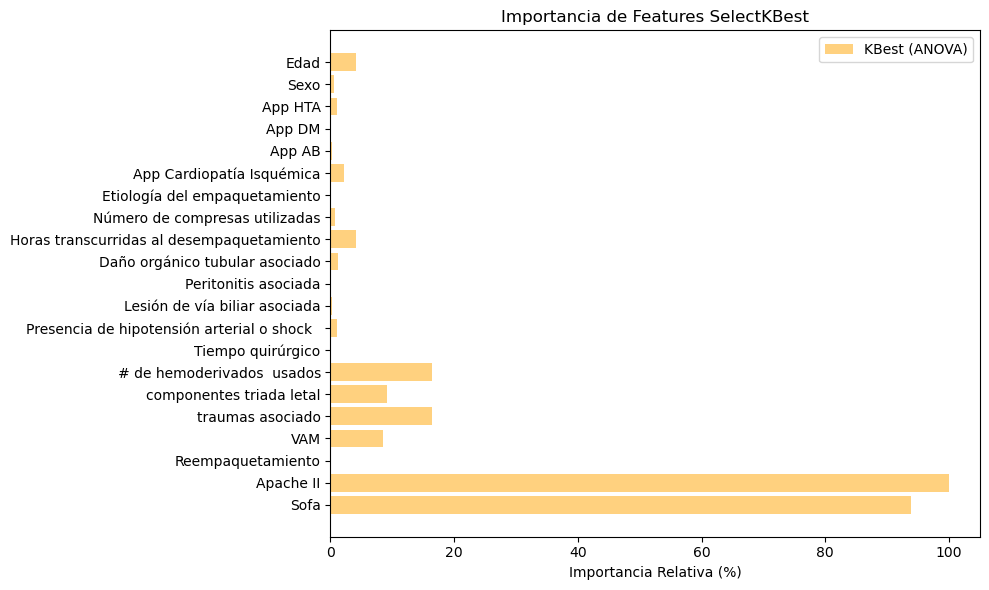

,Feature,KBest_Importance
0,Edad,4.160169
1,Sexo,0.509103
2,App HTA,1.128205
3,App DM,0.018333
4,App AB,0.215686
5,App Cardiopatía Isquémica,2.208627
6,Etiología del empaquetamiento,0.096823
7,Número de compresas utilizadas,0.717132
8,Horas transcurridas al desempaquetamiento,4.106667
9,Daño orgánico tubular asociado,1.212292


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

scores_kbest = selector.scores_
importancia_kbest = 100 * (scores_kbest / scores_kbest.max())

df_importancies = pd.DataFrame({
    'Feature': X.columns,
    'KBest_Importance': importancia_kbest
})

plt.figure(figsize=(10, 6))
plt.barh(df_importancies['Feature'], df_importancies['KBest_Importance'], color='orange', alpha=0.5, label='KBest (ANOVA)')
plt.xlabel('Importancia Relativa (%)')
plt.title('Importancia de Features SelectKBest')
plt.gca().invert_yaxis() 
plt.legend()
plt.tight_layout()
plt.show()

df_importancies

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": Pipeline([
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]),
    "Random Forest": Pipeline([
        ('model', RandomForestClassifier(n_estimators=100))
    ]),
}

models_2 = {
    "Logistic Regression (KBest)": Pipeline([
        ('selector', SelectKBest(score_func=chi2, k=5)),  
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]),
    "Random Forest (KBest)": Pipeline([
        ('selector', SelectKBest(score_func=chi2, k=5)),
        ('model', RandomForestClassifier(n_estimators=100))
    ]),
}

def evaluate_models_loocv(X, y, models):
    results = {}
    
    for model_name, model in models.items():
        y_true, y_pred = [], []
        selected_features = [] 
        
        for train_index, test_index in LeaveOneOut().split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
        
            if 'selector' in model.named_steps:
                selector = model.named_steps['selector']
                selected_mask = selector.get_support()
                selected_features.append(X.columns[selected_mask].tolist())
                
            y_pred_fold = model.predict(X_test)
            y_true.append(y_test.values[0])
            y_pred.append(y_pred_fold[0])
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        
        final_features = []
        if 'selector' in model.named_steps:
            selector = model.named_steps['selector']
            final_features = X.columns[selector.get_support()].tolist()

        results[model_name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "final_features": final_features,
        }

    return results



In [58]:
results = evaluate_models_loocv(X, y, models)
results_2 = evaluate_models_loocv(X, y, models_2)

print("LOOCV Results without Feature Selection:")
for model_name, data in results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {data['accuracy']:.3f}")
    print(f"  Precision: {data['precision']:.3f}")
    print(f"  Recall: {data['recall']:.3f}")
    print(f"  F1-Score: {data['f1']:.3f}")

print("\nLOOCV Results with Feature Selection:")
for model_name, data in results_2.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {data['accuracy']:.3f}")
    print(f"  Precision: {data['precision']:.3f}")
    print(f"  Recall: {data['recall']:.3f}")
    print(f"  F1-Score: {data['f1']:.3f}")
print("  Final Features:\n", data['final_features'])

selected_features = data['final_features']

LOOCV Results without Feature Selection:

Logistic Regression:
  Accuracy: 0.810
  Precision: 0.846
  Recall: 0.846
  F1-Score: 0.846

Random Forest:
  Accuracy: 0.857
  Precision: 0.812
  Recall: 1.000
  F1-Score: 0.897

LOOCV Results with Feature Selection:

Logistic Regression (KBest):
  Accuracy: 0.905
  Precision: 0.923
  Recall: 0.923
  F1-Score: 0.923

Random Forest (KBest):
  Accuracy: 0.905
  Precision: 0.867
  Recall: 1.000
  F1-Score: 0.929
  Final Features:
 ['# de hemoderivados  usados', 'componentes triada letal', 'traumas asociado', 'Apache II', 'Sofa']


In [59]:
selected_features

['# de hemoderivados  usados',
 'componentes triada letal',
 'traumas asociado',
 'Apache II',
 'Sofa']

<Axes: >

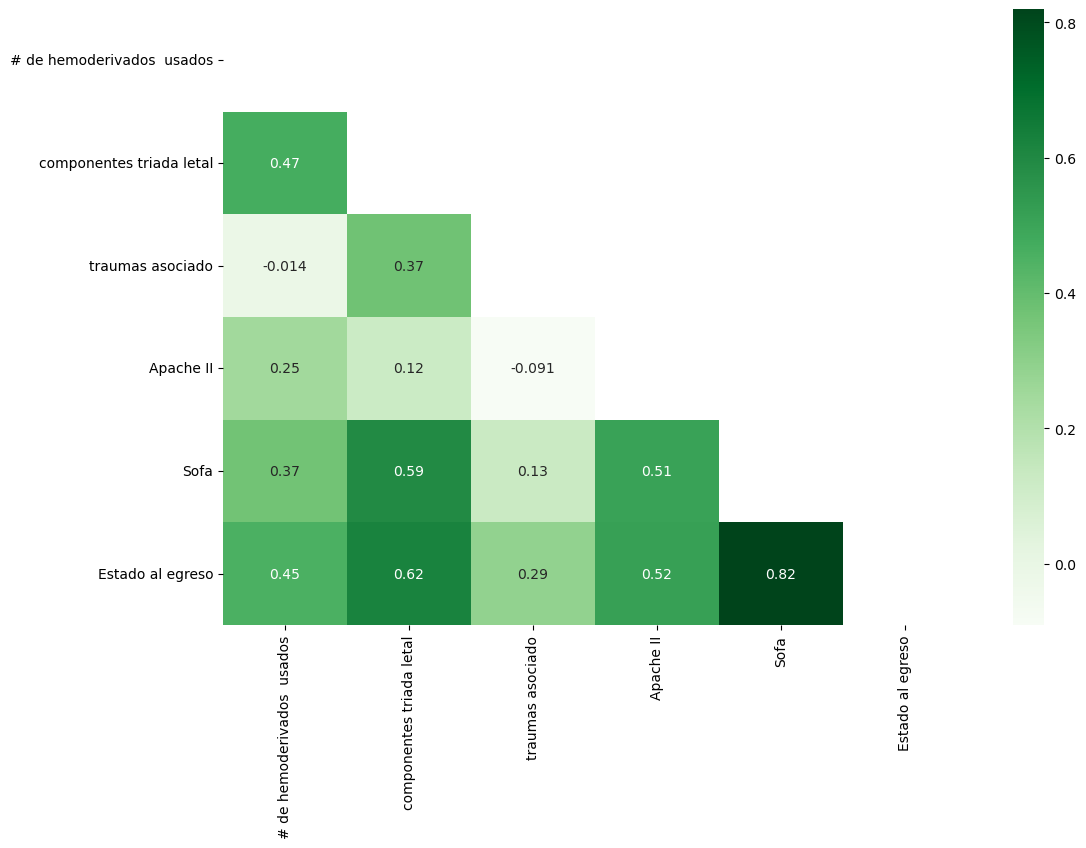

In [60]:
matrix = X[selected_features].join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, cmap='Greens', mask=mask)
